## OM CHOKSI

# 🎯 Learning Objectives


> - Document Classification
> - Text Pre-processing
> - Feature extraction
> - Vocabulary creation

# 📋 Vocabulary & Feature Extraction
> Given a document, you can represent it as a vector of dimension V, where V corresponds to your vocabulary size. As V gets larger, the vector becomes more sparse. Furthermore, we end up having many more features and end up training lot of parameters. This could result in larger training time, and large prediction time.

# 🔨 Preprocessing
When preprocessing, you have to perform the following:
> 1. Eliminate handles and URLs
> 2. Tokenize the string into words
> 3. Remove stop words like "and, is, a, on, etc."
> 4. Stemming - or convert every word to its stem. Like dancer, dancing, danced, becomes 'danc'.
> 5. Convert all your words to lower case.

## Cell 1: Imports & Setup

In [1]:

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds



##  Cell 2: Load Data


In [2]:

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

data_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
data_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

print("Train samples:", len(data_train.data))
print("Test samples:", len(data_test.data))

y_train, y_test = data_train.target, data_test.target
target_names = data_train.target_names



Train samples: 2034
Test samples: 1353


## Cell 3: Feature Extraction


In [3]:

vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')
X_train = vectorizer.fit_transform(data_train.data)
X_test = vectorizer.transform(data_test.data)

# Optional dimensionality reduction
n_components = 100
svd = TruncatedSVD(n_components)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X_train = lsa.fit_transform(X_train)
X_test = lsa.transform(X_test)


## Cell 4: Logistic Regression


Logistic Regression Train Accuracy: 0.95968534906588
Logistic Regression Test Accuracy: 0.8787878787878788


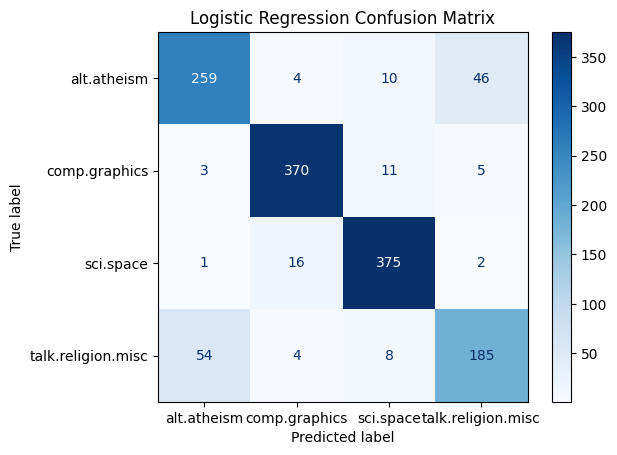

              precision    recall  f1-score      support
0              0.817035  0.811912  0.814465   319.000000
1              0.939086  0.951157  0.945083   389.000000
2              0.928218  0.951777  0.939850   394.000000
3              0.777311  0.737052  0.756646   251.000000
accuracy       0.878788  0.878788  0.878788     0.878788
macro avg      0.865412  0.862974  0.864011  1353.000000
weighted avg   0.877133  0.878788  0.877805  1353.000000


In [4]:
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)

lr_train_pred = lr_clf.predict(X_train)
lr_test_pred = lr_clf.predict(X_test)

print("Logistic Regression Train Accuracy:", accuracy_score(y_train, lr_train_pred))
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, lr_test_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, lr_test_pred), display_labels=target_names).plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

print(pd.DataFrame(classification_report(y_test, lr_test_pred, output_dict=True)).T)

## Cell 5: Naive Bayes


Naive Bayes Train Accuracy: 0.8593903638151426
Naive Bayes Test Accuracy: 0.7871396895787139


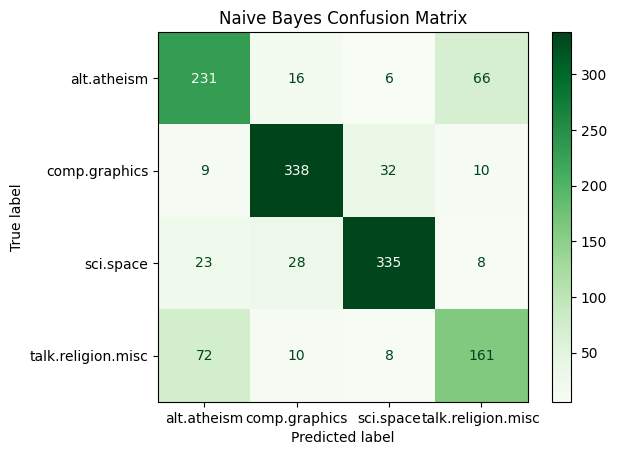

              precision    recall  f1-score     support
0              0.689552  0.724138  0.706422   319.00000
1              0.862245  0.868895  0.865557   389.00000
2              0.879265  0.850254  0.864516   394.00000
3              0.657143  0.641434  0.649194   251.00000
accuracy       0.787140  0.787140  0.787140     0.78714
macro avg      0.772051  0.771180  0.771422  1353.00000
weighted avg   0.788436  0.787140  0.787596  1353.00000


In [5]:

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

nb_train_pred = nb_clf.predict(X_train)
nb_test_pred = nb_clf.predict(X_test)

print("Naive Bayes Train Accuracy:", accuracy_score(y_train, nb_train_pred))
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, nb_test_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, nb_test_pred), display_labels=target_names).plot(cmap="Greens")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

print(pd.DataFrame(classification_report(y_test, nb_test_pred, output_dict=True)).T)



## Cell 6: Support Vector Machine


SVM Train Accuracy: 0.9837758112094396
SVM Test Accuracy: 0.8906134515890614


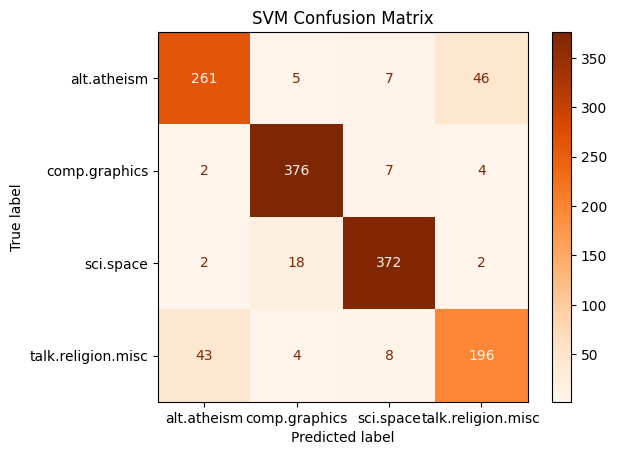

              precision    recall  f1-score      support
0              0.847403  0.818182  0.832536   319.000000
1              0.933002  0.966581  0.949495   389.000000
2              0.944162  0.944162  0.944162   394.000000
3              0.790323  0.780876  0.785571   251.000000
accuracy       0.890613  0.890613  0.890613     0.890613
macro avg      0.878723  0.877450  0.877941  1353.000000
weighted avg   0.889601  0.890613  0.889956  1353.000000


In [6]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

svm_train_pred = svm_clf.predict(X_train)
svm_test_pred = svm_clf.predict(X_test)

print("SVM Train Accuracy:", accuracy_score(y_train, svm_train_pred))
print("SVM Test Accuracy:", accuracy_score(y_test, svm_test_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, svm_test_pred), display_labels=target_names).plot(cmap="Oranges")
plt.title("SVM Confusion Matrix")
plt.show()

print(pd.DataFrame(classification_report(y_test, svm_test_pred, output_dict=True)).T)



## Cell 7: Deep Learning CNN


In [ ]:
# ==============================
# 📌 Cell 7: Deep Learning CNN
# ==============================
from tensorflow.keras.callbacks import ModelCheckpoint

tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    data_train.data, target_vocab_size=2**15
)

train_inputs = [tokenizer.encode(text) for text in data_train.data]
test_inputs = [tokenizer.encode(text) for text in data_test.data]

MAX_LEN = max(len(x) for x in train_inputs)

train_inputs = tf.keras.preprocessing.sequence.pad_sequences(train_inputs, value=0, padding="post", maxlen=MAX_LEN)
test_inputs = tf.keras.preprocessing.sequence.pad_sequences(test_inputs, value=0, padding="post", maxlen=MAX_LEN)

class DCNN(tf.keras.Model):
    def __init__(self, vocab_size, emb_dim=128, nb_filters=50, FFN_units=512, nb_classes=4, dropout_rate=0.1):
        super(DCNN, self).__init__()
        self.embedding = layers.Embedding(vocab_size, emb_dim)
        self.bigram = layers.Conv1D(filters=nb_filters, kernel_size=2, activation="relu")
        self.trigram = layers.Conv1D(filters=nb_filters, kernel_size=3, activation="relu")
        self.fourgram = layers.Conv1D(filters=nb_filters, kernel_size=4, activation="relu")
        self.pool = layers.GlobalMaxPool1D()
        self.dense_1 = layers.Dense(units=FFN_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        self.last_dense = layers.Dense(units=nb_classes, activation="softmax")

    def call(self, inputs, training=False):
        x = self.embedding(inputs)
        x_1 = self.pool(self.bigram(x))
        x_2 = self.pool(self.trigram(x))
        x_3 = self.pool(self.fourgram(x))
        merged = tf.concat([x_1, x_2, x_3], axis=-1)
        merged = self.dense_1(merged)
        merged = self.dropout(merged, training=training)
        return self.last_dense(merged)

VOCAB_SIZE = tokenizer.vocab_size
Dcnn = DCNN(vocab_size=VOCAB_SIZE, emb_dim=128, nb_filters=100, FFN_units=256, nb_classes=len(set(y_train)), dropout_rate=0.5)

Dcnn.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["sparse_categorical_accuracy"])

# Path to save the best model
best_model_path = "best_model.h5"

# Callback to save best model based on validation accuracy
checkpoint_cb = ModelCheckpoint(
    filepath=best_model_path,
    monitor="val_sparse_categorical_accuracy",  # metric to monitor
    save_best_only=True,        # only save when metric improves
    save_weights_only=False,    # save full model
    mode="max",                 # maximize accuracy
    verbose=1                   # print when saving
)

# Train with callback
history = Dcnn.fit(
    train_inputs,
    y_train,
    batch_size=16,
    epochs=10,
    validation_data=(test_inputs, y_test),
    callbacks=[checkpoint_cb]   # ✅ added here
)

NameError: name 'tfds' is not defined

In [ ]:
from tensorflow.keras.models import load_model

# Load the best saved model
best_model = load_model("best_model.h5")

# Evaluate on test set
results = best_model.evaluate(test_inputs, y_test, batch_size=16)
print("Best model test loss:", results[0])
print("Best model test accuracy:", results[1])

## Cell 8: Plot Training Curves


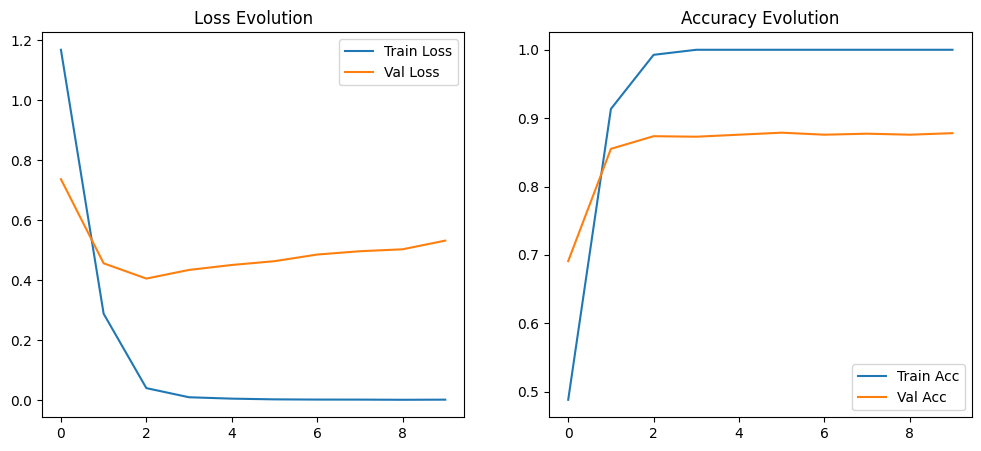

In [8]:

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss Evolution")

plt.subplot(1,2,2)
plt.plot(history.history['sparse_categorical_accuracy'], label='Train Acc')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Val Acc')
plt.legend(); plt.title("Accuracy Evolution")
plt.show()



## Cell 9: Final Evaluation


In [9]:

results = Dcnn.evaluate(test_inputs, y_test, batch_size=16)
print("Final Test Loss:", results[0])
print("Final Test Accuracy:", results[1])

85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.4986 - sparse_categorical_accuracy: 0.8763
Final Test Loss: 0.5311814546585083
Final Test Accuracy: 0.8780487775802612


## Cell 10: Comparison Bar Chart


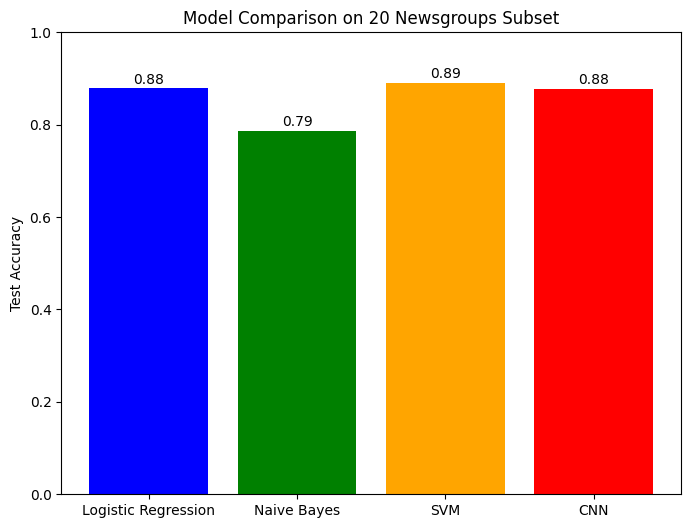

In [ ]:
results_dict = {
    "Logistic Regression": 0.8787878787878788,
    "Naive Bayes": 0.7871396895787139,
    "SVM": 0.8906134515890614
}

plt.figure(figsize=(8,6))
plt.bar(results_dict.keys(), results_dict.values(), color=['blue','green','orange'])
plt.ylabel("Test Accuracy")
plt.title("Model Comparison on 20 Newsgroups Subset")
plt.ylim(0,1)
for i, v in enumerate(results_dict.values()):
    plt.text(i, v+0.01, f"{v:.2f}", ha='center')
plt.show()